Menggunakan Datasheet : application_train.csv

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [89]:
data = pd.read_csv('application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### EDA

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [91]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [92]:
data = data.dropna()
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [93]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,8602.000000,8602.000000,8602.000000,8.602000e+03,8.602000e+03,8602.000000,8.602000e+03,8602.000000,8602.000000,8602.000000,...,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,279002.948617,0.061149,0.602534,2.228724e+05,6.999987e+05,31558.948326,6.338337e+05,0.023543,-14189.009416,-2299.091374,...,0.009998,0.000581,0.001046,0.000233,0.005813,0.005929,0.039061,0.368984,0.258080,1.757615
std,103218.951947,0.239617,0.775007,1.414204e+05,4.649119e+05,16587.353415,4.294083e+05,0.016361,3259.202657,2077.178768,...,0.099493,0.024104,0.032331,0.015247,0.077537,0.095655,0.208770,1.049016,0.596765,1.756799
min,100083.000000,0.000000,0.000000,3.375000e+04,4.500000e+04,2317.500000,4.500000e+04,0.000290,-24835.000000,-14375.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188965.750000,0.000000,0.000000,1.350000e+05,3.150000e+05,19548.000000,2.700000e+05,0.010556,-16299.750000,-3132.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278239.000000,0.000000,0.000000,1.935000e+05,5.850000e+05,29209.500000,4.950000e+05,0.020246,-13883.500000,-1680.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,370083.500000,0.000000,1.000000,2.700000e+05,9.581445e+05,40320.000000,9.000000e+05,0.030755,-11664.500000,-817.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456226.000000,1.000000,5.000000,4.500000e+06,4.050000e+06,225000.000000,4.050000e+06,0.072508,-7715.000000,-4.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,17.000000


In [94]:
data["AMT_INCOME_TOTAL"].fillna(data["AMT_INCOME_TOTAL"].mean(), inplace=True)
data["CODE_GENDER"].fillna(data["CODE_GENDER"].mode()[0], inplace=True)


In [95]:
le = LabelEncoder()
data["CODE_GENDER"] = le.fit_transform(data["CODE_GENDER"])


### Visualisasi

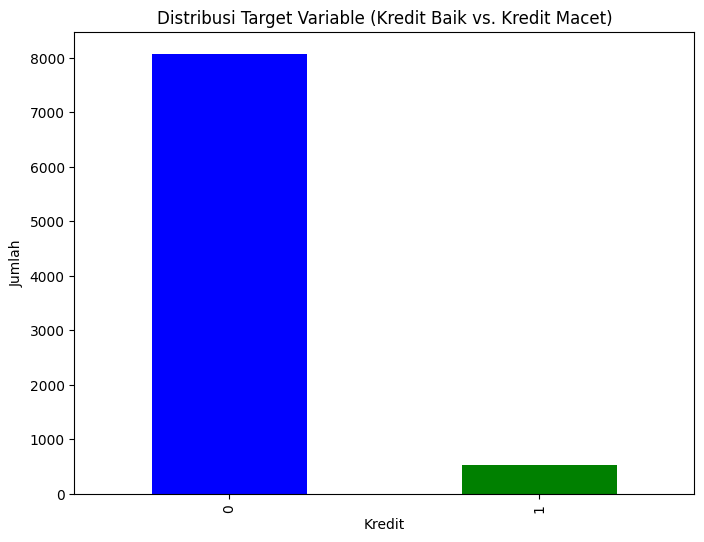

In [96]:
# Target
plt.figure(figsize=(8, 6))
data["TARGET"].value_counts().plot(kind="bar", color=["blue", "green"])
plt.title("Distribusi Target Variable (Kredit Baik vs. Kredit Macet)")
plt.xlabel("Kredit")
plt.ylabel("Jumlah")
plt.show()

Visualisasi Demografi Nasabah

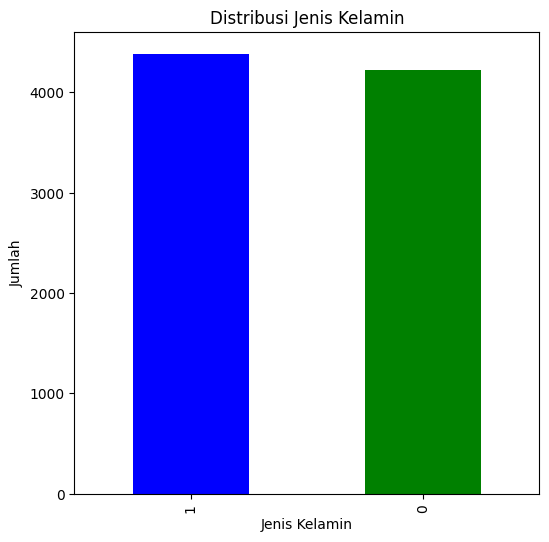

In [97]:
#Gender
plt.figure(figsize=(6, 6))
data["CODE_GENDER"].value_counts().plot(kind="bar", color=["blue", "green"])
plt.title("Distribusi Jenis Kelamin")
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah")
plt.show()

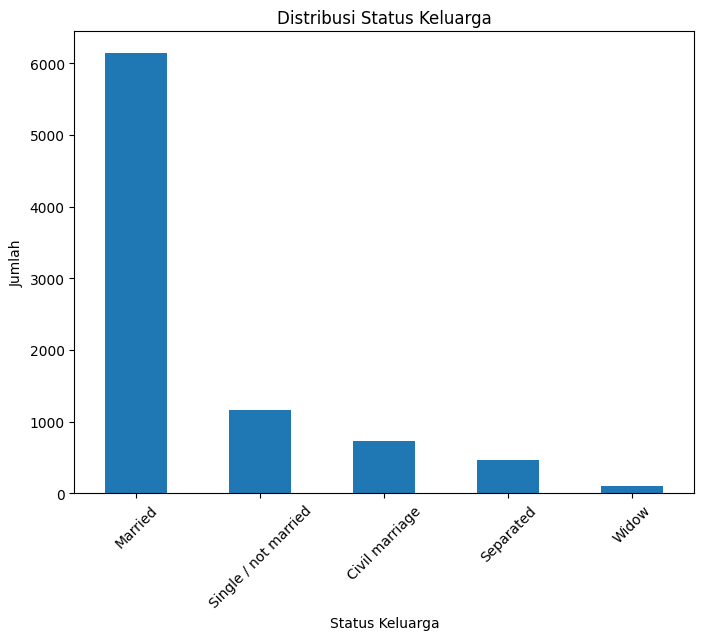

In [98]:
#status keluarga
plt.figure(figsize=(8, 6))
data["NAME_FAMILY_STATUS"].value_counts().plot(kind="bar")
plt.title("Distribusi Status Keluarga")
plt.xlabel("Status Keluarga")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

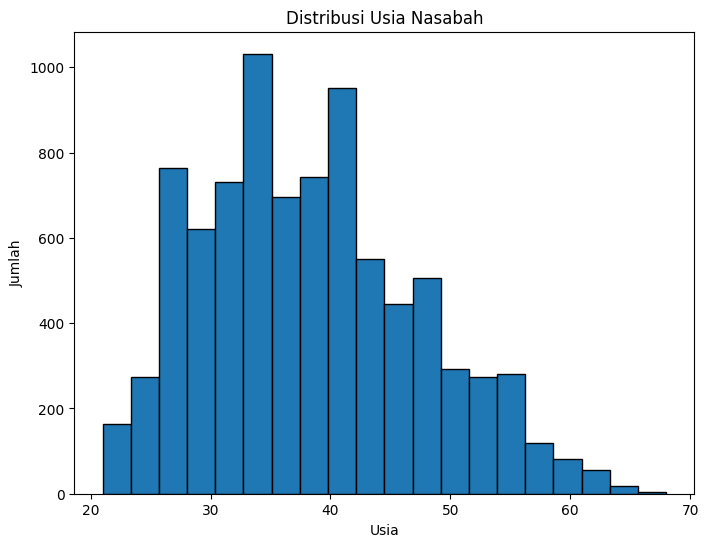

In [99]:
#Umur
data["AGE"] = (data["DAYS_BIRTH"] / -365).astype(int)

plt.figure(figsize=(8, 6))
plt.hist(data["AGE"], bins=20, edgecolor="black")
plt.title("Distribusi Usia Nasabah")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.show()

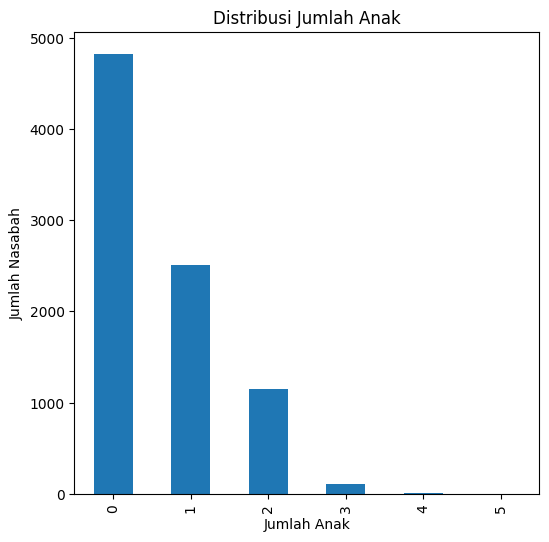

In [100]:
# Jumlah Anak
plt.figure(figsize=(6, 6))
data["CNT_CHILDREN"].value_counts().plot(kind="bar")
plt.title("Distribusi Jumlah Anak")
plt.xlabel("Jumlah Anak")
plt.ylabel("Jumlah Nasabah")
plt.show()

VISUALISASI KEUANGAN NASABAH

<ipython-input-101-eb9ea2c4b48c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AMT_INCOME_TOTAL"], kde=False)


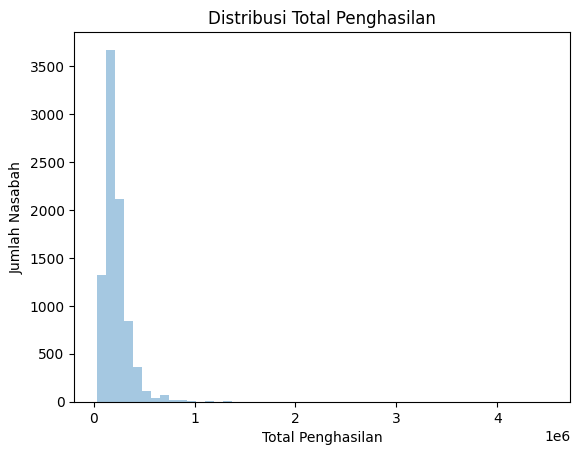

In [101]:
#TOTAL PENGHASILAN
sns.distplot(data["AMT_INCOME_TOTAL"], kde=False)
plt.title("Distribusi Total Penghasilan")
plt.xlabel("Total Penghasilan")
plt.ylabel("Jumlah Nasabah")
plt.show()

<ipython-input-102-b57e72818867>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AMT_CREDIT"], kde=False)


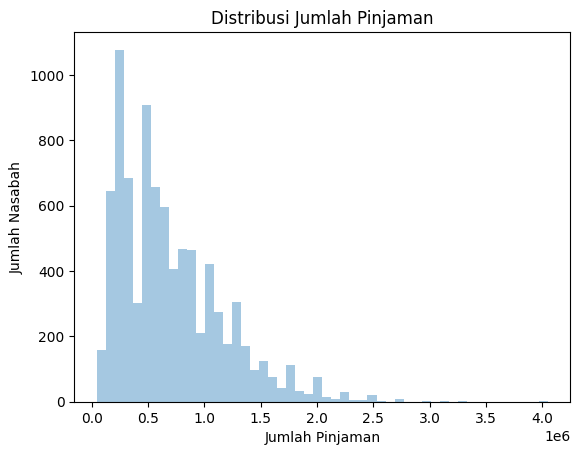

In [102]:
#JUMLAH PINJAMAN
sns.distplot(data["AMT_CREDIT"], kde=False)
plt.title("Distribusi Jumlah Pinjaman")
plt.xlabel("Jumlah Pinjaman")
plt.ylabel("Jumlah Nasabah")
plt.show()

<ipython-input-103-e3cc00a7d629>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["AMT_ANNUITY"], kde=False)


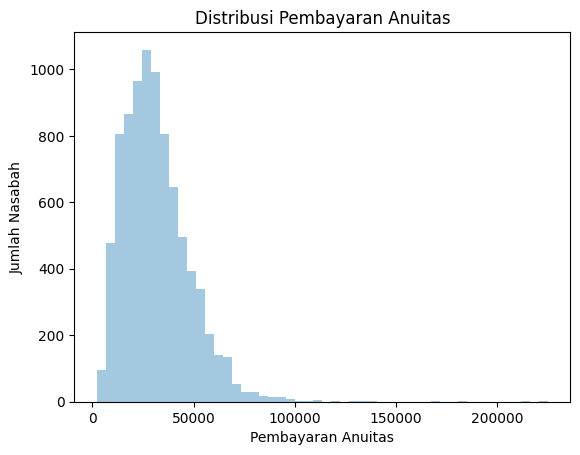

In [103]:
# PEMBAYARAN ANTUISAS
sns.distplot(data["AMT_ANNUITY"], kde=False)
plt.title("Distribusi Pembayaran Anuitas")
plt.xlabel("Pembayaran Anuitas")
plt.ylabel("Jumlah Nasabah")
plt.show()

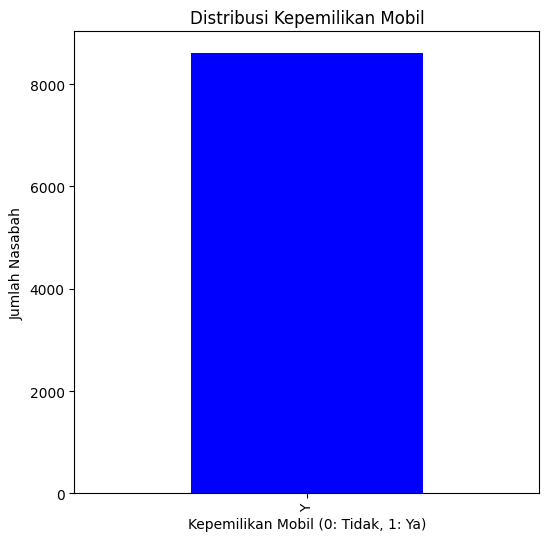

In [104]:
#KEPEMILIKAN MOBIL
plt.figure(figsize=(6, 6))
data["FLAG_OWN_CAR"].value_counts().plot(kind="bar", color=["blue", "green"])
plt.title("Distribusi Kepemilikan Mobil")
plt.xlabel("Kepemilikan Mobil (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah Nasabah")
plt.show()

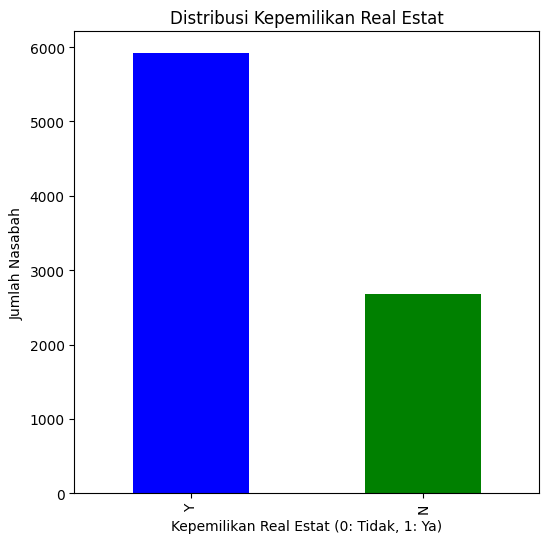

In [105]:
#KEPEMILIKAN REAL ESTE
plt.figure(figsize=(6, 6))
data["FLAG_OWN_REALTY"].value_counts().plot(kind="bar", color=["blue", "green"])
plt.title("Distribusi Kepemilikan Real Estat")
plt.xlabel("Kepemilikan Real Estat (0: Tidak, 1: Ya)")
plt.ylabel("Jumlah Nasabah")
plt.show()

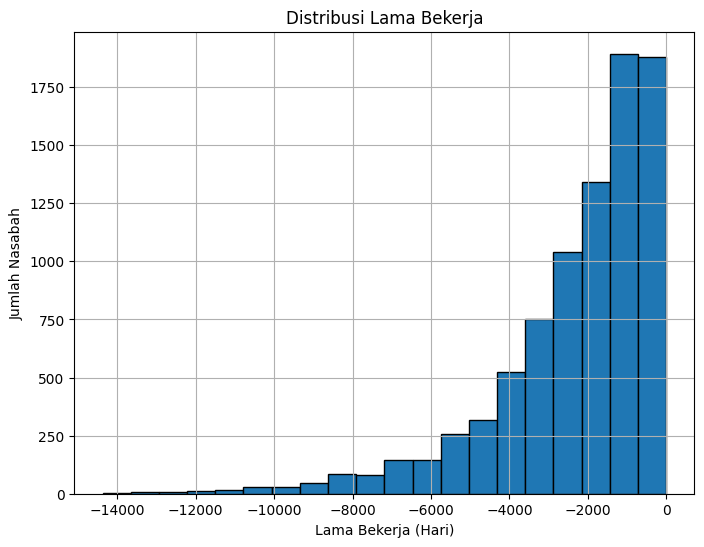

In [106]:
#LAMA BEKERJA
plt.figure(figsize=(8, 6))
data["DAYS_EMPLOYED"].hist(bins=20, edgecolor="black")
plt.title("Distribusi Lama Bekerja")
plt.xlabel("Lama Bekerja (Hari)")
plt.ylabel("Jumlah Nasabah")
plt.show()

### Model Machine Learning

In [108]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

# Menerapkan MinMaxScaler untuk mengonversi nilai-nilai fitur menjadi rentang 0 hingga 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Pilih 10 fitur teratas dengan chi-square setelah normalisasi
selector = SelectKBest(chi2, k=10)
X_reduced = selector.fit_transform(X_scaled, y)


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = LogisticRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))


Akurasi model: 94.54%


In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

Akurasi model: 94.48%


MODEL MEACHINE LEARNING TANPA PEMILIHAN PRINGKAT 10 KOLOM TERATAS

In [111]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["NAME_FAMILY_STATUS"] = le.fit_transform(data["NAME_FAMILY_STATUS"])
data["FLAG_OWN_CAR"] = le.fit_transform(data["FLAG_OWN_CAR"])
data["FLAG_OWN_REALTY"] = le.fit_transform(data["FLAG_OWN_REALTY"])


In [112]:
# REGRESI RANDOM FOREST
from sklearn.metrics import roc_auc_score

X = data[["CODE_GENDER", "NAME_FAMILY_STATUS", "DAYS_BIRTH", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "DAYS_EMPLOYED", "REGION_RATING_CLIENT"]]
y = data["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Performa Random Forest:")
print("Akurasi:", accuracy_rf)
print("ROC AUC:", roc_auc_rf)

Performa Random Forest:
Akurasi: 0.9447995351539803
ROC AUC: 0.49969268592501537


In [113]:
X = data[["CODE_GENDER", "NAME_FAMILY_STATUS", "DAYS_BIRTH", "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "DAYS_EMPLOYED", "REGION_RATING_CLIENT"]]
y = data["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)

print("Performa Regresi Logistik:")
print("Akurasi:", accuracy_logreg)
print("ROC AUC:", roc_auc_logreg)

Performa Regresi Logistik:
Akurasi: 0.9453805926786751
ROC AUC: 0.5
